In [11]:
import sys
import os
print(os.getcwd())
os.chdir("C:\\Users\\Samuel\\Dropbox\\Git Projects\\glo-7030-projet")
print(os.getcwd())

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
sys.path.append("../..")

C:\Users\Samuel\Dropbox\Git Projects\glo-7030-projet
C:\Users\Samuel\Dropbox\Git Projects\glo-7030-projet


In [46]:
from src.mapping.utils import warpPerspective, crop_center
from src.semantic.utils.utils import readfile

rink_2d_label = readfile('data/rink/rink_label')
rink_2d = crop_center(rink_2d_label, 450, 256)

In [48]:
semseg = readfile("data/train/image-104")
semseg = crop_center(semseg, 450, 256)

In [31]:
from src.semantic.net_parameters import p_classes_color
import matplotlib as mpl
import matplotlib.pyplot as plt
cmap = mpl.colors.ListedColormap(p_classes_color)

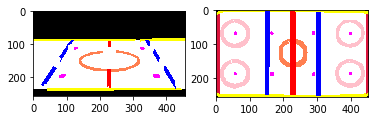

In [44]:
plt.subplot(1,2,1)
plt.imshow(semseg,cmap=cmap)
plt.subplot(1,2,2)
plt.imshow(rink_2d,cmap=cmap)

In [94]:
h = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [95]:
proj= warpPerspective(semseg, h)

In [101]:
print(h)
proj[225,128]

[[1 0 0]
 [0 1 0]
 [0 0 1]]


1.0

In [244]:
proj3 = np.array(np.where(proj == 3))

x3 = np.array([75,375])
y3 = np.array([70,180])

l = 0
for i in range(proj3.shape[1]):
    l = l + (np.min(proj3[0,i]-x4))**2 + (np.min(proj3[1,i]-y4))**2

print(l)

0


In [243]:
proj4 = np.array(np.where(proj == 4))

l = 0
for i in range(proj4.shape[1]):
    l = l + (np.min(proj4[0,i]-225))**2 + (np.min(proj4[1,i]-128))**2

print(l)

46218059


In [248]:
proj8 = np.array(np.where(proj == 8))

x8 = np.array([170,280])
y8 = np.array([70,180])

l = 0
for i in range(proj8.shape[1]):
    l = l + (np.min(proj8[0,i]-x8))**2 + (np.min(proj8[1,i]-y8))**2

print(l)

19064122


In [ ]:
#'ice': 1, 'board': 2, 'circlezone': 3, 'circlemid': 4, 'goal': 5, 'blue': 6, 'red': 7, 'fo': 8